In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from scipy import stats

In [4]:
df=pd.read_csv("uber.csv")

In [5]:
df.shape

(200000, 9)

In [6]:
df.head(5)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [7]:
df.tail(5)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1
199999,11951496,2010-05-15 04:08:00.00000076,14.1,2010-05-15 04:08:00 UTC,-73.984395,40.720077,-73.985508,40.768793,1


In [8]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [10]:
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [11]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [12]:
#Drop the rows with missing values
df.dropna(inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x20800531bd0>,
 'caps': [<matplotlib.lines.Line2D at 0x2087a0f88d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2080054eb10>],
 'medians': [<matplotlib.lines.Line2D at 0x20800561b10>],
 'fliers': [<matplotlib.lines.Line2D at 0x20800562450>],
 'means': []}

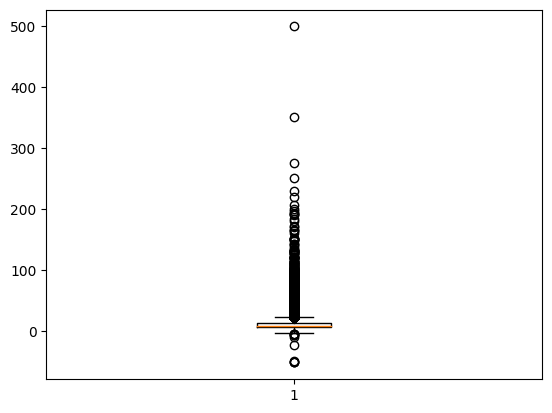

In [13]:
plt.boxplot(df['fare_amount'])

In [14]:
#Remove Outliers
q_low = df["fare_amount"].quantile(0.01)
q_hi  = df["fare_amount"].quantile(0.99)

df = df[(df["fare_amount"] < q_hi) & (df["fare_amount"] > q_low)]

{'whiskers': [<matplotlib.lines.Line2D at 0x208005ea890>,
 'caps': [<matplotlib.lines.Line2D at 0x208005ebc10>,
 'boxes': [<matplotlib.lines.Line2D at 0x208005ea210>],
 'medians': [<matplotlib.lines.Line2D at 0x208005f8e10>],
 'fliers': [<matplotlib.lines.Line2D at 0x208005f96d0>],
 'means': []}

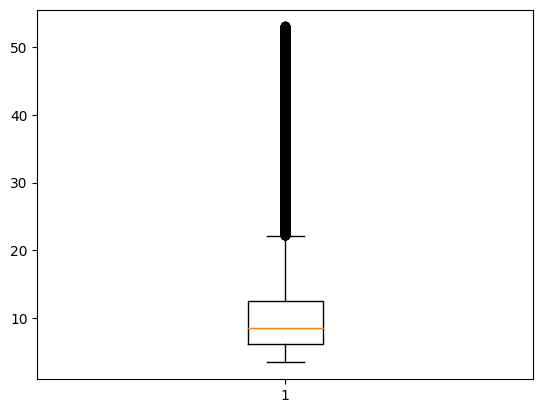

In [15]:
plt.boxplot(df['fare_amount'])

In [16]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [17]:
# Select only numeric columns from the dataframe
numeric_df = df.select_dtypes(include=[np.number])

In [18]:
numeric_df.corr()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
Unnamed: 0,1.000000,-0.000339,-0.000209,-0.000028,-0.000107,0.000647,0.002241
fare_amount,-0.000339,1.000000,0.006534,-0.004843,0.006012,-0.007651,0.012145
pickup_longitude,-0.000209,0.006534,1.000000,-0.810943,0.832846,-0.846712,-0.000737
pickup_latitude,-0.000028,-0.004843,-0.810943,1.000000,-0.773097,0.697275,-0.001288
dropoff_longitude,-0.000107,0.006012,0.832846,-0.773097,1.000000,-0.914509,-0.000020
dropoff_latitude,0.000647,-0.007651,-0.846712,0.697275,-0.914509,1.000000,-0.000537
passenger_count,0.002241,0.012145,-0.000737,-0.001288,-0.000020,-0.000537,1.000000


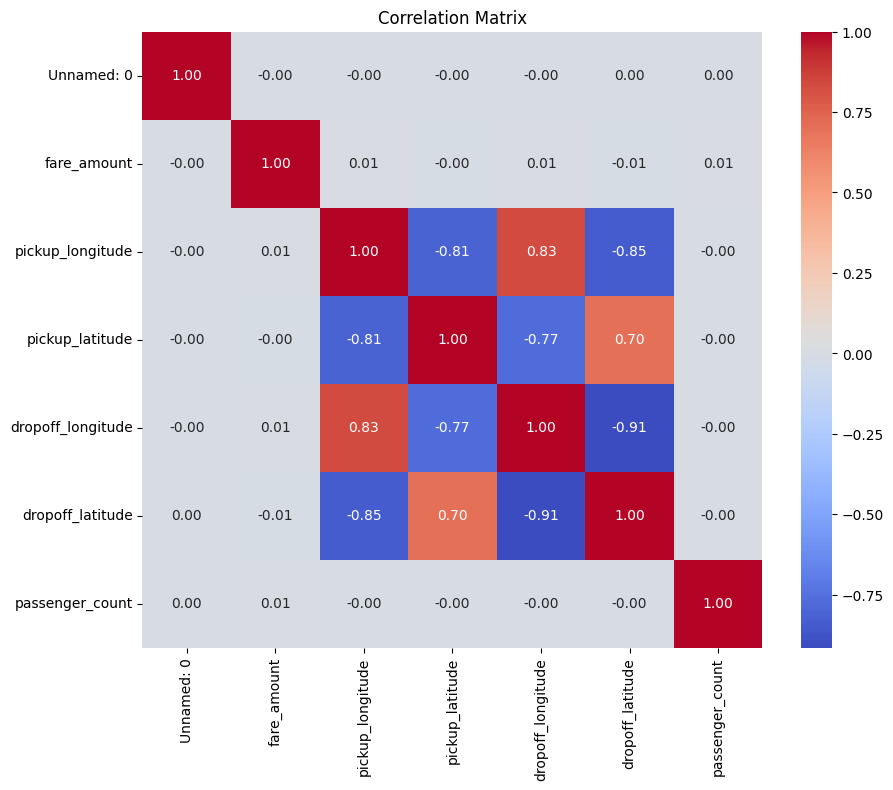

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [20]:
# Define the feature set (X) and target (y)
X = df.drop('fare_amount', axis=1)  # Assuming 'fare_amount' is the target variable
y = df['fare_amount']

In [21]:
#Necessary to apply model
X['pickup_datetime'] = pd.to_numeric(pd.to_datetime(X['pickup_datetime']))
X = X.loc[:, X.columns.str.contains('^Unnamed')]

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

In [27]:
#Let's Apply Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=101, n_jobs=-1)

In [28]:
#Fit the Forest
rfrmodel.fit(X_train, y_train)
rfrmodel_pred = rfrmodel.predict(X_test)

In [29]:
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{model_name} Model Performance:")
    print(f"R² Score: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}\n")

In [30]:
# Evaluate Linear Regression
evaluate_model(y_test, y_pred_lr, "Linear Regression")

Linear Regression Model Performance:
R² Score: -0.0000
RMSE: 8.1113



In [32]:
# Evaluate Random Forest Regression
evaluate_model(y_test, rfrmodel_pred, "Random Forest Regression")

Random Forest Regression Model Performance:
R² Score: -0.0016
RMSE: 8.1176

